In [ ]:
#connect google drive
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 98.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f3228a8d33afc1c8c69adc73bf85280f41de277ee35799250f298816eac88604
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
#importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport      # Used to create auto EDA report
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder      # Used for scaling and encoding
import warnings
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing dataset
dfloan = pd.read_csv('/content/drive/MyDrive/ML project/loan_data.csv')

In [ ]:
dfloan.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [ ]:
dfloan.shape

(45000, 14)

In [ ]:
dfloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  int64  
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
dfloan.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
dfloan.duplicated().sum()

np.int64(0)

In [ ]:
#No feilds with null values or duplicates, but we need to encode the catagorical variables and check for the skewness,outliers and class imbalances

<Axes: xlabel='person_age'>

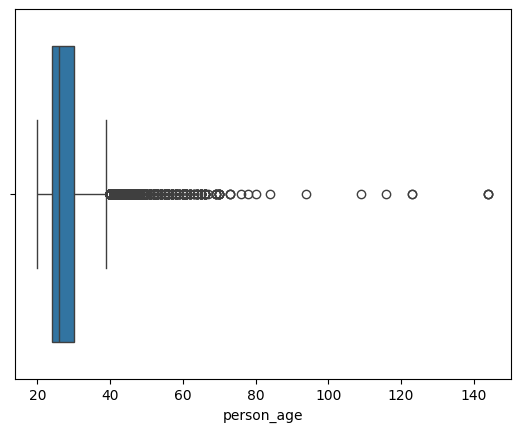

In [ ]:
#Plotting boxplots to identify the skewness and outliers
sns.boxplot(x=dfloan['person_age'])

In [ ]:
numerical = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
categorical = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

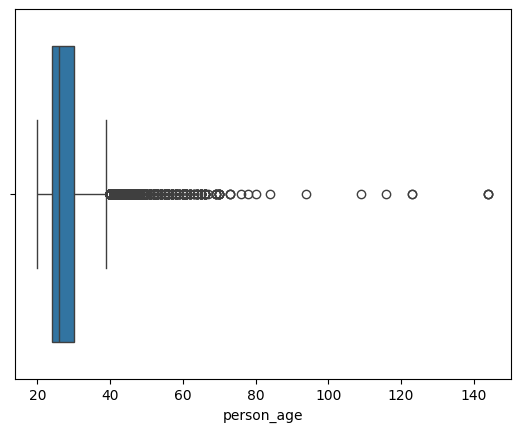

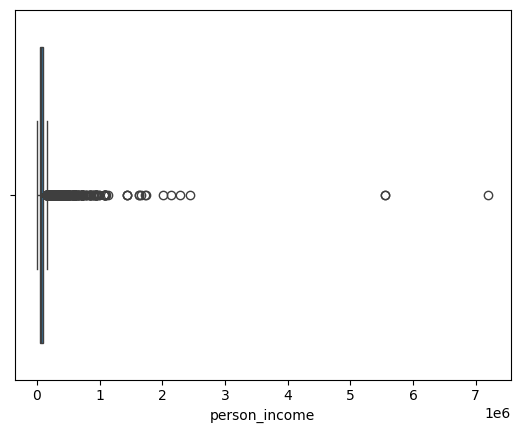

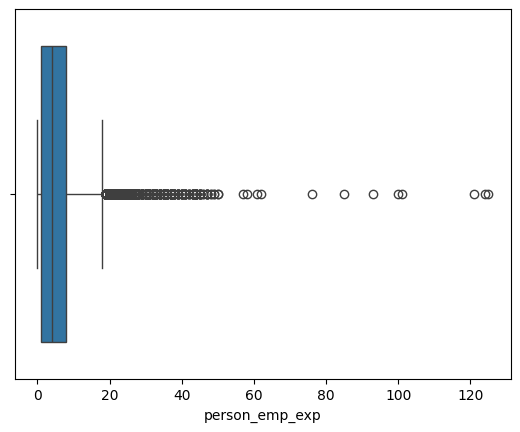

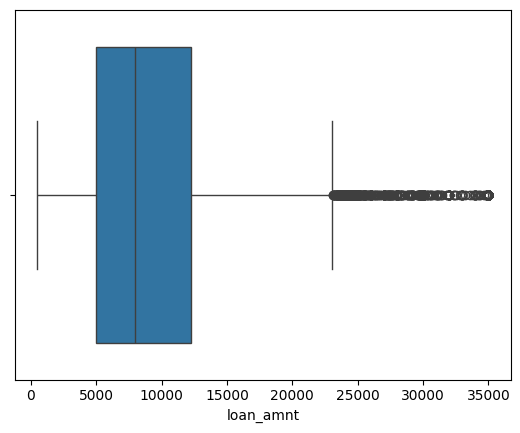

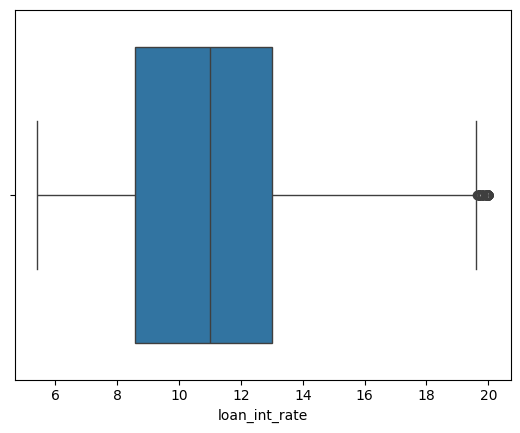

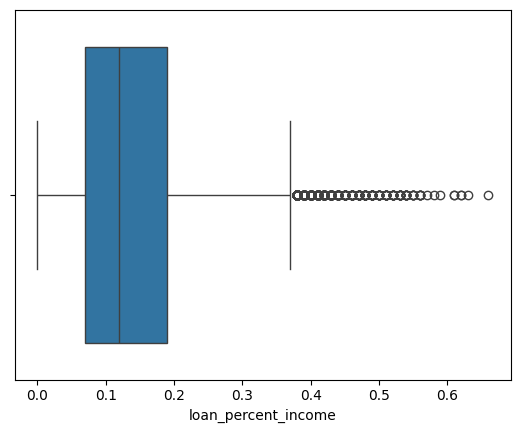

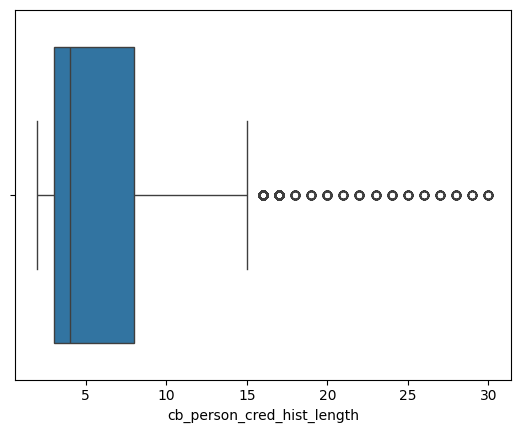

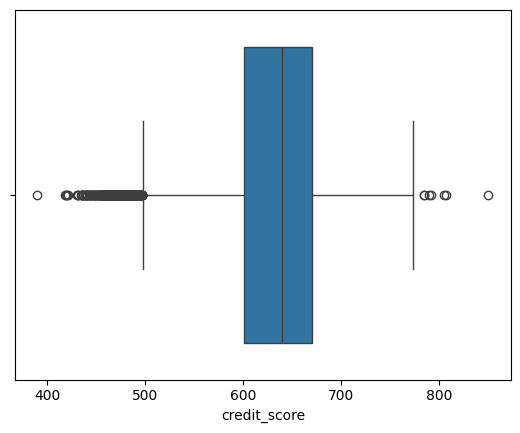

In [ ]:
for i in numerical:
  sns.boxplot(x=dfloan[i])
  plt.show()

In [ ]:
#Seems like data is skewed and there are many outliers we need to treat this.

In [ ]:
#Each coloumn is treated with winsorization
from scipy.stats.mstats import winsorize

# Specify the percentage of data we need to trim from both ends
trim_percentage = 0.10

for i in numerical:
  # Winsorize the specified column
  dfloan[i] = winsorize(dfloan[i], limits = trim_percentage)



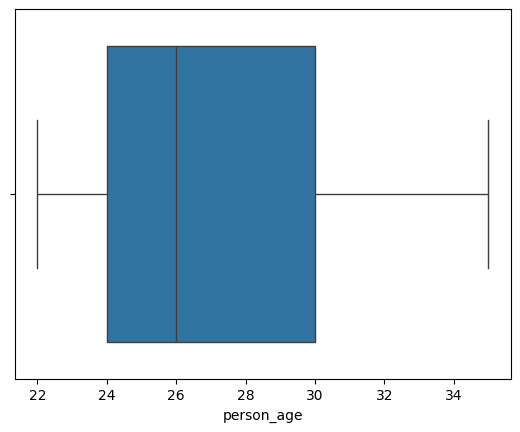

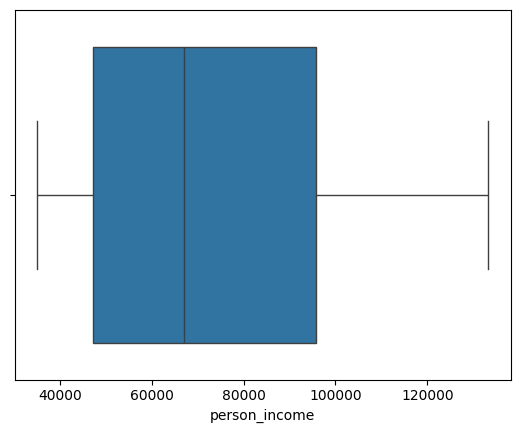

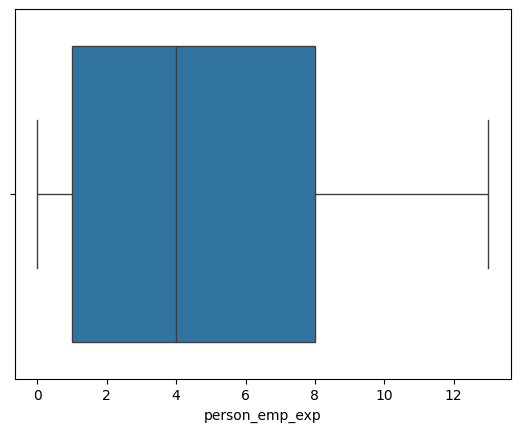

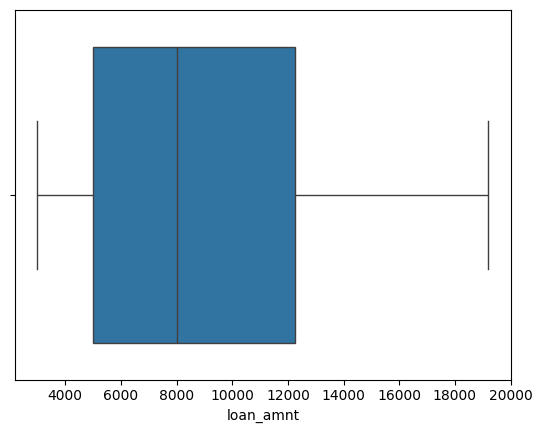

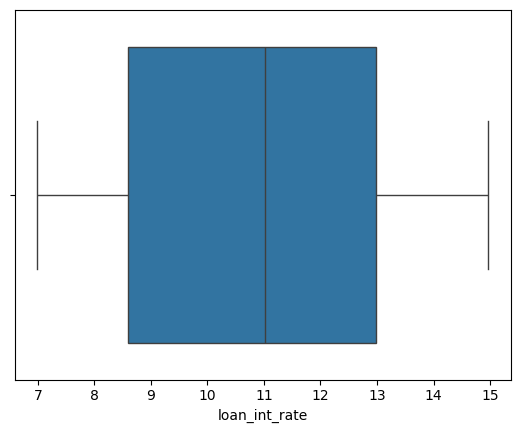

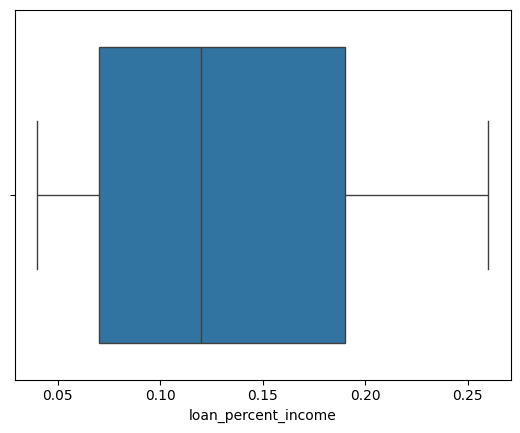

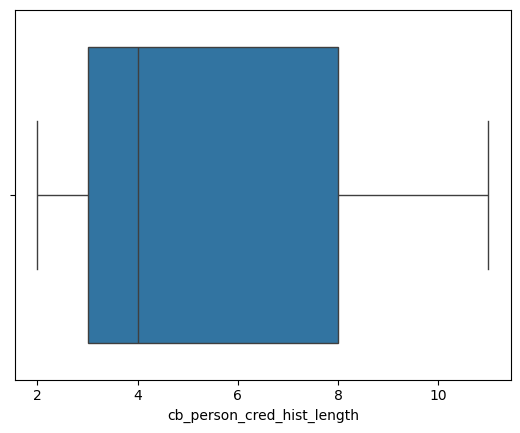

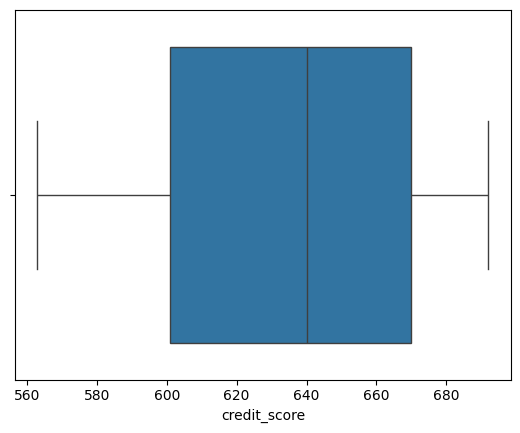

In [ ]:
for i in numerical:
  sns.boxplot(x=dfloan[i])
  plt.show()

In [ ]:
#Now outliers are handled since there are no null cols we can dive in to correlation analysis, wel perform correletion analysis against the target variable and then perform multicolinear analysis
numeric_df = dfloan.select_dtypes(include=['int64', 'float64'])

correlation_with_target = numeric_df.corr()['loan_status'].sort_values(ascending=False)
print(correlation_with_target)


loan_status                   1.000000
loan_percent_income           0.356084
loan_int_rate                 0.313119
loan_amnt                     0.104064
credit_score                 -0.007627
cb_person_cred_hist_length   -0.019826
person_emp_exp               -0.025411
person_age                   -0.026318
person_income                -0.249431
Name: loan_status, dtype: float64


In [ ]:
numeric_df = dfloan.select_dtypes(include=['int64', 'float64'])

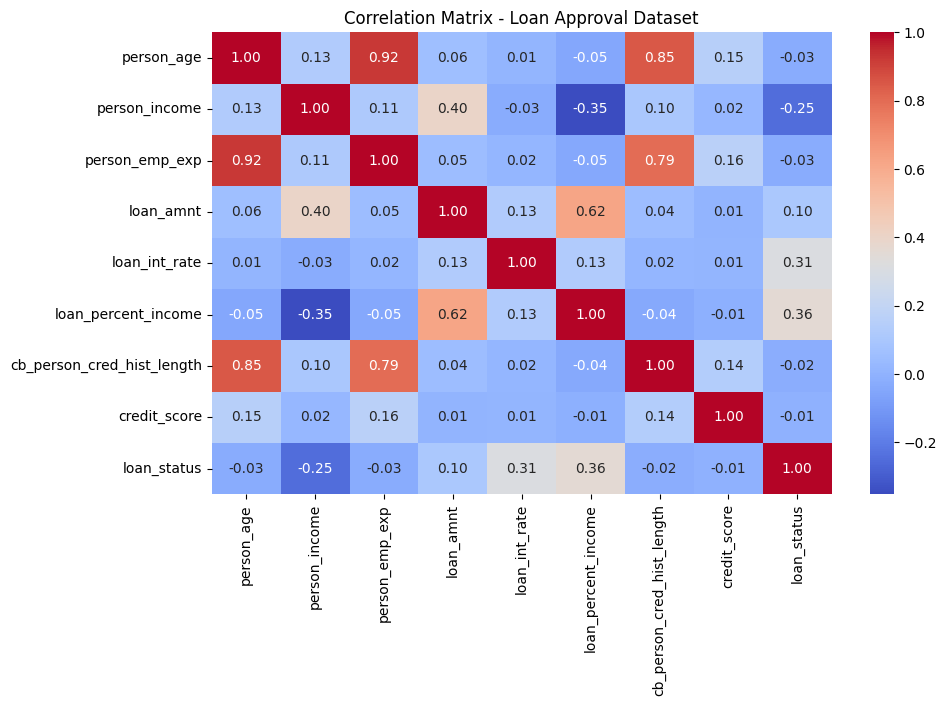

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Loan Approval Dataset")
plt.show()

In [ ]:
#Combining colums due to high correlation (Dont Do)

dfloan['experience_proxy'] = (dfloan['person_age'] + dfloan['person_emp_exp'] + dfloan['cb_person_cred_hist_length']) / 3

In [ ]:
#Dropping original columns since they are combined into one (Dont Do)
dfloan.drop(['person_age', 'person_emp_exp', 'cb_person_cred_hist_length'], axis=1, inplace=True)

In [ ]:
#Dataset should be splited before encoding, normalizing and PCA since they use fit transform
from sklearn.model_selection import train_test_split

x=dfloan.drop('loan_status',axis=1)
y=dfloan['loan_status']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
25180,34,female,Bachelor,97265,11,MORTGAGE,15000,PERSONAL,12.73,0.15,9,631,No
12555,25,male,High School,72953,3,RENT,12000,VENTURE,11.86,0.16,4,659,Yes
29153,35,female,Master,133276,13,MORTGAGE,19200,PERSONAL,10.37,0.07,11,683,Yes
23838,27,male,Associate,94232,4,RENT,9600,EDUCATION,14.97,0.10,7,641,No
35686,27,male,Master,84873,7,RENT,7059,HOMEIMPROVEMENT,12.97,0.08,3,692,Yes


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
25180,34,female,Bachelor,97265,11,MORTGAGE,15000,PERSONAL,12.73,0.15,9,631,No
12555,25,male,High School,72953,3,RENT,12000,VENTURE,11.86,0.16,4,659,Yes
29153,35,female,Master,133276,13,MORTGAGE,19200,PERSONAL,10.37,0.07,11,683,Yes
23838,27,male,Associate,94232,4,RENT,9600,EDUCATION,14.97,0.10,7,641,No
35686,27,male,Master,84873,7,RENT,7059,HOMEIMPROVEMENT,12.97,0.08,3,692,Yes


In [ ]:
count = dfloan['person_education'].value_counts()
print(count)

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64


In [ ]:
# Encoding the categorical colums
# Perform one hot ecoding for person_gender, loan_intent, previous_defaults
# Perform ordinal encoding for person_education, person_home_ownership

x_train = pd.get_dummies(x_train, columns=['loan_intent'], prefix = ['loan_intent'])
x_train.head()

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_No,previous_loan_defaults_Yes,person_gender_female,person_gender_male,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
25180,34,Bachelor,97265,11,MORTGAGE,15000,12.73,0.15,9,631,True,False,True,False,False,False,False,False,True,False
12555,25,High School,72953,3,RENT,12000,11.86,0.16,4,659,False,True,False,True,False,False,False,False,False,True
29153,35,Master,133276,13,MORTGAGE,19200,10.37,0.07,11,683,False,True,True,False,False,False,False,False,True,False
23838,27,Associate,94232,4,RENT,9600,14.97,0.10,7,641,True,False,False,True,False,True,False,False,False,False
35686,27,Master,84873,7,RENT,7059,12.97,0.08,3,692,False,True,False,True,False,False,True,False,False,False


In [ ]:
#Performing ordinal encoding person education
education_enc = OrdinalEncoder(categories=[['High School','Associate','Bachelor','Master','Doctorate']])
x_train['person_education'] = education_enc.fit_transform(x_train[['person_education']])
x_train.head()

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_No,previous_loan_defaults_Yes,person_gender_female,person_gender_male,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
25180,34,2.0,97265,11,MORTGAGE,15000,12.73,0.15,9,631,True,False,True,False,False,False,False,False,True,False
12555,25,0.0,72953,3,RENT,12000,11.86,0.16,4,659,False,True,False,True,False,False,False,False,False,True
29153,35,3.0,133276,13,MORTGAGE,19200,10.37,0.07,11,683,False,True,True,False,False,False,False,False,True,False
23838,27,1.0,94232,4,RENT,9600,14.97,0.10,7,641,True,False,False,True,False,True,False,False,False,False
35686,27,3.0,84873,7,RENT,7059,12.97,0.08,3,692,False,True,False,True,False,False,True,False,False,False


In [ ]:
#Performing ordinal encoding person home ownership
home_enc = OrdinalEncoder(categories=[['OTHER','RENT','MORTGAGE','OWN']])
x_train['person_home_ownership'] = home_enc.fit_transform(x_train[['person_home_ownership']])
x_train.head()

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_No,previous_loan_defaults_Yes,person_gender_female,person_gender_male,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
25180,34,2.0,97265,11,2.0,15000,12.73,0.15,9,631,True,False,True,False,False,False,False,False,True,False
12555,25,0.0,72953,3,1.0,12000,11.86,0.16,4,659,False,True,False,True,False,False,False,False,False,True
29153,35,3.0,133276,13,2.0,19200,10.37,0.07,11,683,False,True,True,False,False,False,False,False,True,False
23838,27,1.0,94232,4,1.0,9600,14.97,0.10,7,641,True,False,False,True,False,True,False,False,False,False
35686,27,3.0,84873,7,1.0,7059,12.97,0.08,3,692,False,True,False,True,False,False,True,False,False,False


In [ ]:
#Since Average approach is not good, PCA with Fit transform is done
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features_to_pca = ['person_age', 'person_emp_exp', 'cb_person_cred_hist_length']

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[features_to_pca])
x_test_scaled = scaler.transform(x_test[features_to_pca])

pca = PCA(n_components=1)
x_train['experiance_pca'] = pca.fit_transform(x_train_scaled)
x_test['experiance_pca'] = pca.transform(x_test_scaled)

In [ ]:
x_train.drop(features_to_pca, axis=1, inplace=True)
x_test.drop(features_to_pca, axis=1, inplace=True)

In [ ]:
x_train.head()

,person_education,person_income,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_No,previous_loan_defaults_Yes,person_gender_female,person_gender_male,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,experiance_pca
25180,2.0,97265,2.0,15000,12.73,0.15,631,True,False,True,False,False,False,False,False,True,False,2.437278
12555,0.0,72953,1.0,12000,11.86,0.16,659,False,True,False,True,False,False,False,False,False,True,-0.821067
29153,3.0,133276,2.0,19200,10.37,0.07,683,False,True,True,False,False,False,False,False,True,False,3.219791
23838,1.0,94232,1.0,9600,14.97,0.10,641,True,False,False,True,False,True,False,False,False,False,0.155933
35686,3.0,84873,1.0,7059,12.97,0.08,692,False,True,False,True,False,False,True,False,False,False,-0.199584


In [ ]:
#Performing normalization on numerical features fit transform only on the training set

cols_scale = ['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'credit_score','experiance_pca']

scaler = StandardScaler()
x_train[cols_scale] = scaler.fit_transform(x_train[cols_scale])
x_test[cols_scale] = scaler.transform(x_test[cols_scale])


In [ ]:
x_train.head()

,person_education,person_income,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_No,previous_loan_defaults_Yes,person_gender_female,person_gender_male,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,experiance_pca
25180,2.0,0.732888,2.0,1.115355,0.691700,0.221041,-0.077303,True,False,True,False,False,False,False,False,True,False,1.480237
12555,0.0,-0.035224,1.0,0.533832,0.357075,0.361231,0.593752,False,True,False,True,False,False,False,False,False,True,-0.498660
29153,3.0,1.870617,2.0,1.929487,-0.216019,-0.900480,1.168942,False,True,True,False,False,False,False,False,True,False,1.955483
23838,1.0,0.637063,1.0,0.068613,1.553265,-0.479910,0.162359,True,False,False,True,False,True,False,False,False,False,0.094703
35686,3.0,0.341376,1.0,-0.423937,0.784011,-0.760290,1.384638,False,True,False,True,False,False,True,False,False,False,-0.121214


In [ ]:
#Now perfom encoding test dataset
#One hot encoding person_gender, loan_intent, previous_defaults
x_test = pd.get_dummies(x_test, columns=['previous_loan_defaults_on_file'], prefix = ['previous_loan_defaults'])
x_test.head()

,person_education,person_income,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,credit_score,experiance_pca,person_gender_female,person_gender_male,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_No,previous_loan_defaults_Yes
37979,Associate,0.720250,MORTGAGE,-0.338453,-1.516058,-0.760290,-0.796291,1.345309,False,True,False,True,False,False,False,False,True,False
9911,Associate,-0.544360,RENT,-0.047691,0.214763,0.361231,0.306157,-0.340490,False,True,False,True,False,False,False,False,False,True
43386,Master,-1.161705,RENT,-0.823055,1.518648,-0.059339,1.384638,-0.994225,True,False,False,False,False,True,False,False,True,False
13822,Bachelor,-1.078108,OWN,-0.823055,1.176330,-0.059339,-0.892156,-0.943645,True,False,False,False,False,False,False,True,False,True
44810,High School,-0.192530,MORTGAGE,0.146150,1.553265,0.221041,-1.155784,1.955483,False,True,False,False,True,False,False,False,True,False


In [ ]:
#Ordinal encoding on person education
x_test['person_education'] = education_enc.transform(x_test[['person_education']])
x_test.head()

,person_education,person_income,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,credit_score,experiance_pca,person_gender_female,person_gender_male,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_No,previous_loan_defaults_Yes
37979,1.0,0.720250,MORTGAGE,-0.338453,-1.516058,-0.760290,-0.796291,1.345309,False,True,False,True,False,False,False,False,True,False
9911,1.0,-0.544360,RENT,-0.047691,0.214763,0.361231,0.306157,-0.340490,False,True,False,True,False,False,False,False,False,True
43386,3.0,-1.161705,RENT,-0.823055,1.518648,-0.059339,1.384638,-0.994225,True,False,False,False,False,True,False,False,True,False
13822,2.0,-1.078108,OWN,-0.823055,1.176330,-0.059339,-0.892156,-0.943645,True,False,False,False,False,False,False,True,False,True
44810,0.0,-0.192530,MORTGAGE,0.146150,1.553265,0.221041,-1.155784,1.955483,False,True,False,False,True,False,False,False,True,False


In [ ]:
#Ordinal encoding on person home ownership
x_test['person_home_ownership'] = home_enc.transform(x_test[['person_home_ownership']])
x_test.head()

,person_education,person_income,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,credit_score,experiance_pca,person_gender_female,person_gender_male,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_No,previous_loan_defaults_Yes
37979,1.0,0.720250,2.0,-0.338453,-1.516058,-0.760290,-0.796291,1.345309,False,True,False,True,False,False,False,False,True,False
9911,1.0,-0.544360,1.0,-0.047691,0.214763,0.361231,0.306157,-0.340490,False,True,False,True,False,False,False,False,False,True
43386,3.0,-1.161705,1.0,-0.823055,1.518648,-0.059339,1.384638,-0.994225,True,False,False,False,False,True,False,False,True,False
13822,2.0,-1.078108,3.0,-0.823055,1.176330,-0.059339,-0.892156,-0.943645,True,False,False,False,False,False,False,True,False,True
44810,0.0,-0.192530,2.0,0.146150,1.553265,0.221041,-1.155784,1.955483,False,True,False,False,True,False,False,False,True,False


In [ ]:
train_processed = x_train.copy()
train_processed['loan_status'] = y_train

test_processed = x_test.copy()
test_processed['loan_status'] = y_test

train_processed.to_csv('preprocessed_train_new.csv', index=False)
test_processed.to_csv('preprocessed_test_new.csv', index=False)

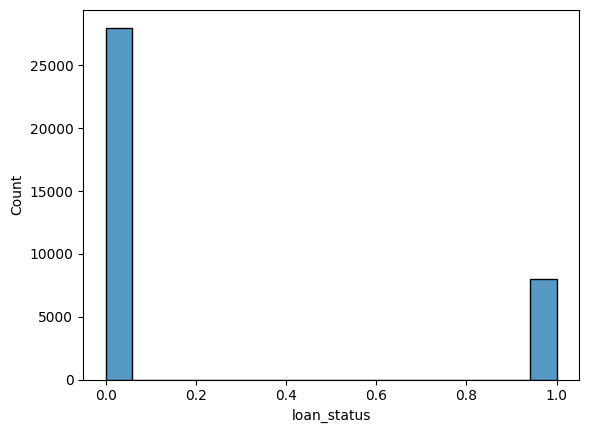

In [ ]:
#just for test

sns.histplot(x=y_train)
plt.show()